## L2D Assignment - Machine Learning 4:

This notebook contains your assignment questions for the **Clustering Introduction** lesson. Please attempt and complete all questions. The topics this assignment will assess are:

1. Clustering Introduction


When you have completed your assignment, please commit the changes to your GitHub repository's 'Assignments' folder, as instructed in the [Assignments section](https://learntodiscover.github.io/L2D-Handbook/section7.html) of the [L2D Handbook](https://learntodiscover.github.io/L2D-Handbook).


Create the training and prediction workflow as shown in the lesson for a dataset with two other features, namely: Diastole and Systole values from the `patients_data.csv` file.


In [1]:
#Import required modules and functions:

import numpy as np
from numpy import arange, asarray, linspace, zeros, c_, mgrid, meshgrid, array, dot, percentile
from numpy import histogram, cumsum, around
from numpy import vstack, sqrt, logspace, amin, amax, equal, count_nonzero
from numpy.random import uniform, seed, randint, randn, multivariate_normal

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, scatter, xlabel, ylabel, axis, figure, colorbar, title, show
from matplotlib.colors import LogNorm

from pandas import read_csv

from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

1. Extract the Diastole and Systole columns.

In [2]:
# Read the patients data 
df = read_csv("patients_data.csv") 

# Obtain the "Diastole" and "Systole" columns form the earlier propcessed data 
df_1 = df[['Systolic','Diastolic']].values

# Process(using StandardScaler()) the earlier specified data to improve the performace in the following tasks
scaler = StandardScaler()
processed_data = scaler.fit_transform(df_1)

2. Use the data to fit a Gaussian model with 2 components and create a state space contour plot of the negative log likelihood with scattered data superimposed.

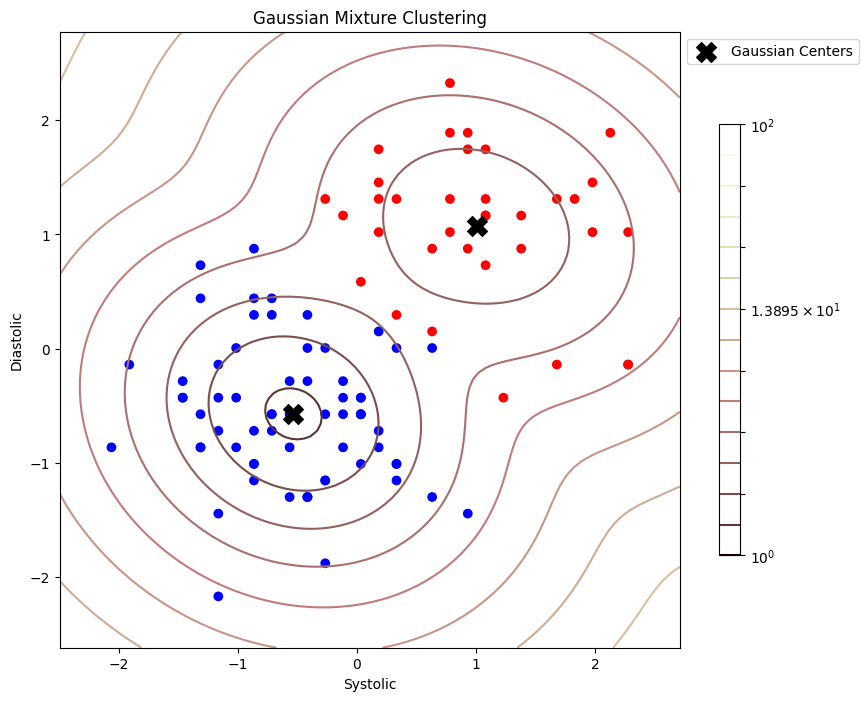

In [3]:
# Initialize the GMM model with 2 components and fit it to earlier specified data
n_components = 2
gmm = GaussianMixture(n_components=n_components)
gmm.fit(processed_data)

# Define the range of the space grid, including some extra grid space (extra margin space)
resolution = 100
margin_x = (processed_data[:, 0].max() - processed_data[:, 0].min()) * 0.1
margin_y = (processed_data[:, 1].max() - processed_data[:, 1].min()) * 0.1

# Use linespace() to create evenly spaced points across the whole data
vec_a = linspace(processed_data[:,0].min() - margin_x, processed_data[:, 0].max() + margin_x, resolution)
vec_b = linspace(processed_data[:,1].min() - margin_y, processed_data[:,1].max() + margin_y, resolution)

# Create the grid 
grid_a, grid_b = meshgrid(vec_a, vec_b)

# Make the grid suitable(using ravle()) for the GMM input and processing
XY_statespace = c_[grid_a.ravel(), grid_b.ravel()]

# Using gmm.score_samples() to calculate the log likelihood for each point in the grid
Z_score = gmm.score_samples(XY_statespace)

# Convert the log likelihhod results into the same shape for easier plotting 
Z_s = Z_score.reshape(grid_a.shape)

# Visualize the negative log-likelihood results:
fig, ax = subplots(figsize=(10, 8))

# 1. Plot the contor lines 
im = ax.contour(grid_a, grid_b, -Z_s, 
        
           # 2. Use LogNorm() to give more insight into likelihood values 
           norm=LogNorm(vmin=1.0, vmax=100.0),
           levels=logspace(0, 2, 15),
           cmap='pink'
          )

# 3. Add a colorbar for easier interpretation of step 2.
fig.colorbar(im, shrink=0.7)

# Superimpose the original data points onto the contor plot 
y_predict = gmm.predict(processed_data)

# Use color coordinations to identify the points with the cluster ("Systolic" or "Diastolic")
ax.scatter(processed_data[:, 0], processed_data[:, 1], c=y_predict, cmap='bwr');

# For visual clearance identify the centers of the two Gaussian distributions on the final plot
centers = gmm.means_
ax.scatter(centers[:, 0], centers[:, 1], c= "black", s=200, marker= "X", label="Gaussian Centers")

# Add title, lables and visual style preference 
ax.set_xlabel('Systolic')
ax.set_ylabel('Diastolic')
ax.legend(loc = "upper right", bbox_to_anchor =(1.3,1), ncol = 1);
ax.set_title("Gaussian Mixture Clustering")
ax.set_facecolor('white')

3. Extract the model weights, the means of the two Gaussians and their corresponding covariance matrices.

In [4]:
# Extract the weights, means, and covarients of the Gaussian model (using gmm. correlating functions)
weights = gmm.weights_
means = gmm.means_ 
covariances = gmm.covariances_

# Give a title for the display of the components for clearnace and structure 
print("Gaussian Model Parameters:")

# Looping through each paramenter identified earlier, display the annotated numerical result for each component
for i in range(len(weights)):
    print("\n")
    print(f"Component {i + 1}:")
    print(f" Weight: {weights[i]:.3f}")
    print(f" Mean: {means[i]}")
    print(f" Covariance Matrices: {covariances[i]}")



Gaussian Model Parameters:


Component 1:
 Weight: 0.654
 Mean: [-0.53435418 -0.57125727]
 Covariance Matrices: [[ 0.4174159  -0.05505527]
 [-0.05505527  0.3720449 ]]


Component 2:
 Weight: 0.346
 Mean: [1.00843288 1.07807637]
 Covariance Matrices: [[ 0.54365806 -0.08154812]
 [-0.08154812  0.40697173]]


4. Calculate the adjusted random score for the labels 'gender' and 'smoker' in the data to estimate whether these have some overlap with the model fit.

In [5]:
# Import the necessary library for the label encoding 
label_encoder = LabelEncoder()

# Convert the "Gender" column into numeric values, for the later use in the adjusted rand score calculation 
y_gender = label_encoder.fit_transform(df["Gender"])

# Calculate the overlap between the "Gender" label column and GMM clusters
gender_scoring = adjusted_rand_score(y_gender, y_predict)

# Print out the score for interpretation 
print(f"Gender Adjusted Rand Score:", gender_scoring)

Gender Adjusted Rand Score: 0.030809331315545804


Calculated adjusted random score for the label 'Gender' show minimal overlap between the clustering produced by the GMM and the 'Gender' label. 

In [6]:
# Obtain the "Smoker" column's vlaues
y_smoker = df["Smoker"]

# Calculate the overlap between the "Somker" label column and GMM clusters
smoker_scoring = adjusted_rand_score(y_smoker, y_predict)

# Print out the score for interpretation 
print(f"Smoker Adjusted Rand Score:", smoker_scoring)

Smoker Adjusted Rand Score: 0.7349708237209933


Calculated adjusted random score for the label 'Smoker' show substantial overlap between the clustering produced by the GMM and the 'Smoker' label. 

5. Compare the original scatter plot versus the model generated scatter plot. Use a total of 100 samples for the model generated data and distribute them according to the model weights.

In [7]:
# Identify the total number of samples for the model generated data
total_samples = 100

# Using the earlier identified "weights" parameter, multiple it by the samples number to obtain sample number for each cluster 
weights_component = (weights * total_samples).astype(int)
print("Samples per component:", weights_component)

Samples per component: [65 34]


In [8]:
# Create a list for sample storage 
model_data = []

# Lopping through each component, create an array of samples generated from the Gaussian distribution 
for i, n_samples in enumerate(weights_component):
    samples = np.random.multivariate_normal(mean=means[i], cov=covariances[i], size=n_samples)
    model_data.append(samples)
model_data = np.vstack(model_data)

/tmp/ipykernel_25404/164622441.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


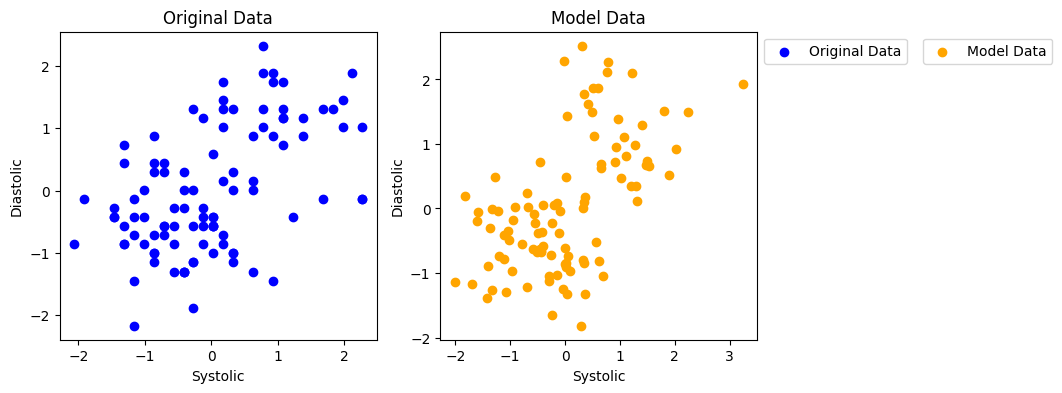

In [9]:
# Create two side-by-side subplots, for easy visual comparison 
fig, ax = subplots(ncols=2, figsize=(9, 4))

# Plot the original data scatter plot,
# use the processed data, which has the same distrubution and scale paramenters as the model data, increasing accuracy 
ax[0].scatter(processed_data[:, 0], processed_data[:, 1], c='blue', label = "Original Data");
ax[0].set_title('Original Data')
ax[0].set_xlabel('Systolic')
ax[0].set_ylabel('Diastolic')
ax[0].legend(loc = "upper left", bbox_to_anchor =(2.2,1), ncol = 1);

# Plot the model generated scatter plot
ax[1].scatter(model_data[:, 0], model_data[:, 1], c="orange", label = "Model Data");
ax[1].set_title('Model Data')
ax[1].set_xlabel('Systolic')
ax[1].set_ylabel('Diastolic')
ax[1].legend(loc = "upper left",bbox_to_anchor =(1.5,1), ncol = 1)
fig.tight_layout()

6. Repeat the plot multiple times to see how the degree of overlap in the model output changes with each choice of samples from the fitted distribution.

In [10]:
# Identify the total number of samples for the model generated data
total_samples_1 = 30

# Using the earlier identified "weights" parameter, multiple it by the samples number to obtain sample number for each cluster
weights_component_1 = (weights * total_samples_1).astype(int)
print("Samples per component:", weights_component_1)

Samples per component: [19 10]


In [11]:
# Create a list for sample storage 
model_data_1 = []

# Lopping through each component, to create an array of samples generated from the Gaussian distribution 
for i, n_samples_1 in enumerate(weights_component_1):
    samples_1 = np.random.multivariate_normal(mean=means[i], cov=covariances[i], size=n_samples_1)
    model_data_1.append(samples_1)
model_data_1 = np.vstack(model_data_1)

/tmp/ipykernel_25404/2173687914.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


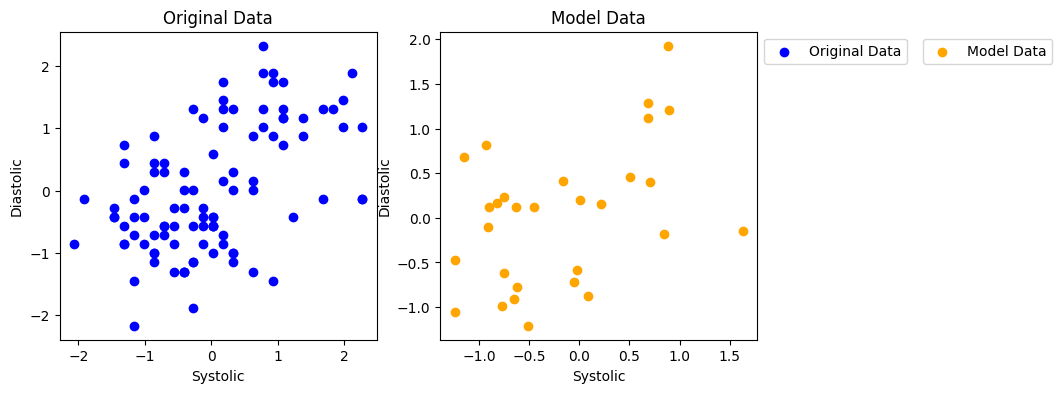

In [12]:
# Create two side-by-side subplots, for easy visual comparison 
fig, ax = subplots(ncols=2, figsize=(9, 4))

# Plot the original data scatter plot,
# use the processed data, which has the same distrubution and scale paramenters as the model data, increasing accuracy 
ax[0].scatter(processed_data[:, 0], processed_data[:, 1], c='blue', label = "Original Data");
ax[0].set_title('Original Data')
ax[0].set_xlabel('Systolic')
ax[0].set_ylabel('Diastolic')
ax[0].legend(loc = "upper left", bbox_to_anchor =(2.2, 1), ncol = 1);

# Plot the model generated scatter plot
ax[1].scatter(model_data_1[:, 0], model_data_1[:, 1], c="orange", label = "Model Data");
ax[1].set_title('Model Data')
ax[1].set_xlabel('Systolic')
ax[1].set_ylabel('Diastolic')
ax[1].legend(loc = "upper left",bbox_to_anchor =(1.5, 1), ncol = 1)
fig.tight_layout()

In [13]:
# Identify the total number of samples for the model generated data
total_samples_2 = 150

# Using the earlier identified "weights" parameter, multiple it by the samples number to obtain sample number for each cluster
weights_component_2 = (weights * total_samples_2).astype(int)
print("Samples per component:", weights_component_2)

Samples per component: [98 51]


In [14]:
# Create a list for sample storage 
model_data_2 = []

# Lopping through each component, to create an array of samples generated from the Gaussian distribution 
for i, n_samples_2 in enumerate(weights_component_2):
    samples_2 = np.random.multivariate_normal(mean=means[i], cov=covariances[i], size=n_samples_2)
    model_data_2.append(samples_2)
model_data_2 = np.vstack(model_data_2)

/tmp/ipykernel_25404/1620427314.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


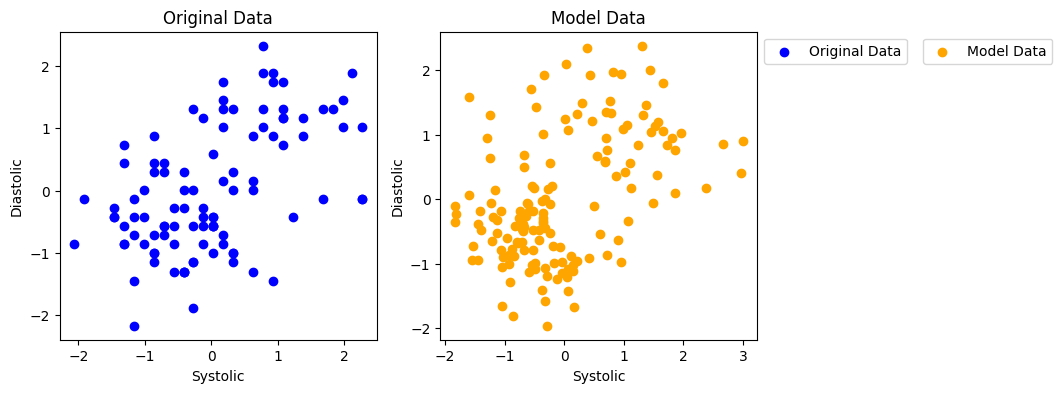

In [15]:
# Create two side-by-side subplots, for easy visual comparison 
fig, ax = subplots(ncols=2, figsize=(9, 4))

# Plot the original data scatter plot,
# use the processed data, which has the same distrubution and scale paramenters as the model data, increasing accuracy 
ax[0].scatter(processed_data[:, 0], processed_data[:, 1], c='blue', label = "Original Data");
ax[0].set_title('Original Data')
ax[0].set_xlabel('Systolic')
ax[0].set_ylabel('Diastolic')
ax[0].legend(loc = "upper left", bbox_to_anchor =(2.2, 1), ncol = 1);

#P lot the model generated scatter plot
ax[1].scatter(model_data_2[:, 0], model_data_2[:, 1], c="orange", label = "Model Data");
ax[1].set_title('Model Data')
ax[1].set_xlabel('Systolic')
ax[1].set_ylabel('Diastolic')
ax[1].legend(loc = "upper left",bbox_to_anchor =(1.5, 1), ncol = 1)
fig.tight_layout()

In [16]:
# Identify the total number of samples for the model generated data
total_samples_3 = 250

# Using the earlier identified "weights" parameter, multiple it by the samples number to obtain sample number for each cluster
weights_component_3 = (weights * total_samples_3).astype(int)
print("Samples per component:", weights_component_3)

Samples per component: [163  86]


In [17]:
# Create a list for sample storage 
model_data_3 = []

# Lopping through each component, to create an array of samples generated from the Gaussian distribution 
for i, n_samples_3 in enumerate(weights_component_3):
    samples_3 = np.random.multivariate_normal(mean=means[i], cov=covariances[i], size=n_samples_3)
    model_data_3.append(samples_3)
model_data_3 = np.vstack(model_data_3)

/tmp/ipykernel_25404/3713455481.py:17: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


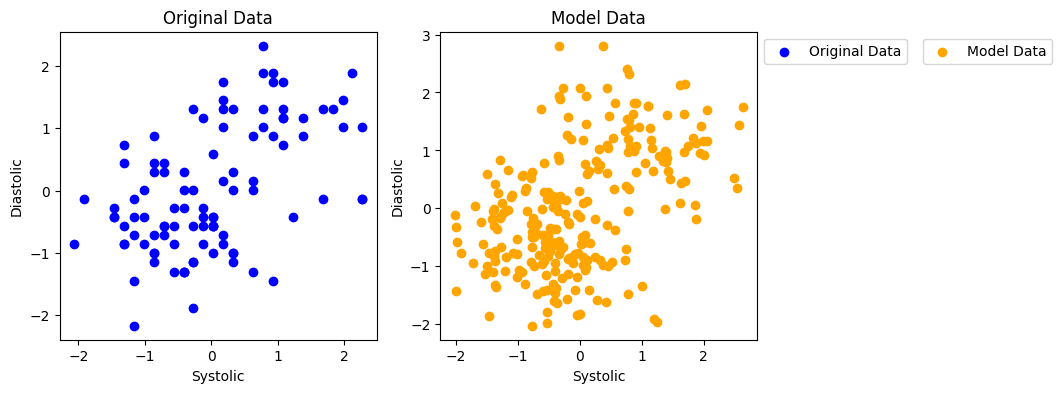

In [18]:
# Create two side-by-side subplots, for easy visual comparison 
fig, ax = subplots(ncols=2, figsize=(9, 4))

# Plot the original data scatter plot,
# use the processed data, which has the same distrubution and scale paramenters as the model data, increasing accuracy
ax[0].scatter(processed_data[:, 0], processed_data[:, 1], c='blue', label = "Original Data");
ax[0].set_title('Original Data')
ax[0].set_xlabel('Systolic')
ax[0].set_ylabel('Diastolic')
ax[0].legend(loc = "upper left", bbox_to_anchor =(2.2, 1), ncol = 1);

ax[1].scatter(model_data_3[:, 0], model_data_3[:, 1], c="orange", label = "Model Data");
ax[1].set_title('Model Data')
ax[1].set_xlabel('Systolic')
ax[1].set_ylabel('Diastolic')
ax[1].legend(loc = "upper left",bbox_to_anchor =(1.5, 1), ncol = 1)
fig.tight_layout()

7. Create corresponding histograms of the Diastolic and Systolic blood pressure values from data and model. Try to guess where the differences in appearance come from.


The data show systematic gaps in the histogram meaning that some values do not occur (integer values only). In contrast, the model data from the random number generator can take any value. Therefore the counts per bin are generally lower for the model.


In [19]:
# Using GMM model, generate the same number of samples as the original data set
model, _ = gmm.sample(len(processed_data))

# Use the processed "Systolic" column
systolic_data = processed_data[:, 0]

# Extract the "Systolic" data from the GMM samples 
systolic_model = model[:, 0]


In [20]:
# Identify and display shape types of both "Systolic" data sets to ensure they have matching parameters 
data1 = systolic_data
print("Shape of 'Systolic' values obtained from the processed original data:", data1.shape)
data2 = systolic_model
print("Shape of 'Systolic' vlaues obtained form the model generated data:", data2.shape )

Shape of 'Systolic' values obtained from the processed original data: (100,)
Shape of 'Systolic' vlaues obtained form the model generated data: (100,)


In [21]:
# Use the processed "Diastolic" column
diastolic_data = processed_data[:, 1]

# Extract the "Diastolic" data from the GMM samples 
diastolic_model = model[:, 1]

In [22]:
# Identify and display shape types of both "Diastolic" data sets to ensure they have matching parameters 
data1_2 = diastolic_data
print("Shape of 'Diastolic' values obtained from the processed original data:", data1_2.shape )
data2_2 = diastolic_model
print("Shape of 'Diastolic' vlaues obtained form the model generated data:", data2_2.shape )

Shape of 'Diastolic' values obtained from the processed original data: (100,)
Shape of 'Diastolic' vlaues obtained form the model generated data: (100,)


/tmp/ipykernel_25404/616345777.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
/tmp/ipykernel_25404/616345777.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


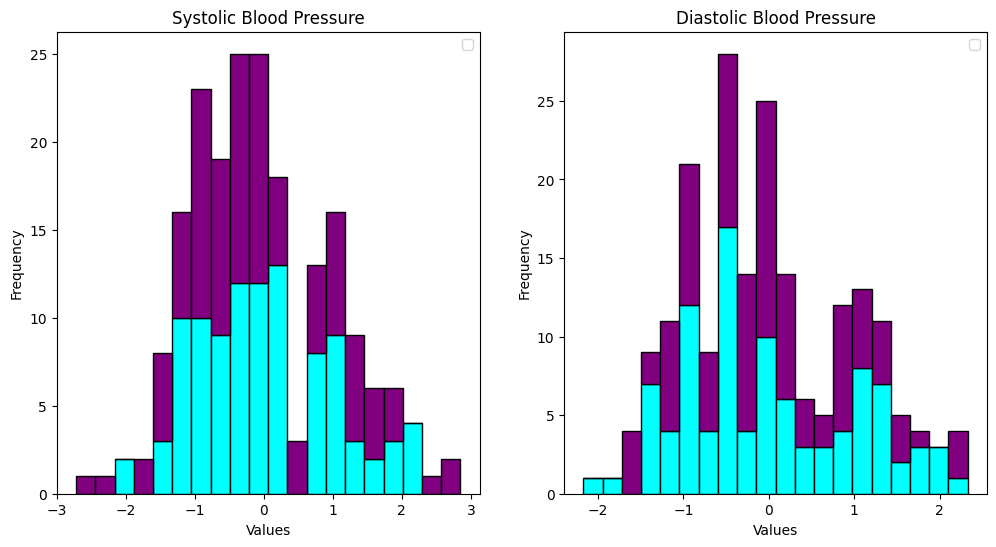

In [23]:
# Create two side-by-side subplots, for easy visual comparison
fig, ax = subplots(1, 2, figsize = (12,6))

# Plot a single histogram for Systolic Blood Pressure representing data from both data sets
combined_data_1 = [data1, data2]
ax[0].hist(combined_data_1, bins=20, stacked=True, color=['cyan', 'Purple'], edgecolor='black')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Systolic Blood Pressure')
ax[0].legend()

# Plot a single histogram for Diastolic Blood Pressure representing data from both data sets
combined_data_2 = [data1_2, data2_2]
ax[1].hist(combined_data_2, bins=20, stacked=True, color=['cyan', 'Purple'], edgecolor='black')
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Diastolic Blood Pressure')
ax[1].legend()

I believe that the differences in appearance between the original and model generated "Systolic" and "Diastolic" data sets could come from facts like: 

1 - The original data was derived for real-world measurements, resulting in the display of discrete gaps(e.g.rounding to the nearest integer of the blood presure readings). On the other hand, the model data is not restricted to integer rounding, so displays a continuous distribution. 

2 - The original data has "spikes" of frequenies at certain values due to once again rounding or more frequent apperance of certain "standard" readings(e.g. 120; 130). In contrast, GMM samples can source any value within the Gaussian range, again showing a more even distribution. 